# Pattern NLP Sentiment Analysis Package


links: https://github.com/clips/pattern

In [4]:
from pattern.en import sentiment
import os
from matplotlib import pyplot as plt

# local imports
from comment_scraper import get_sql_table

In [5]:
### Repeat steps from nltk_vader pre-processing

# analysis testing here is done on comments scraped from MSNBC videos
DATA_DIR = 'C:\\Users\\keatu\\Regis_archive\\practicum2_data\\'
dbname = os.path.join(DATA_DIR, "Youtube_Data_msnbc.db")

# combine scraped comments and channel info into one dataframe
comments = get_sql_table('comments', dbname)
comments = comments.replace("nan",0)
videos = get_sql_table('videos',dbname)
videos = videos.replace("nan",0)
combined = comments.merge(videos, on='videoId', how="inner", suffixes=("","_video"))

# Take the most popular videos using likeCount
top_videos = combined.groupby("videoId").aggregate({"likeCount_video":"first"}).reset_index().sort_values('likeCount_video', ascending=False).head(10)['videoId'].tolist()
topdf = combined.loc[combined['videoId'].isin(top_videos)]

In [6]:
# create new column for sentiment score using the Pattern "sentiment" function
topdf['sentiment_score'] = topdf["textOriginal"].apply(lambda x: sentiment(x)[0])

c:\Users\keatu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


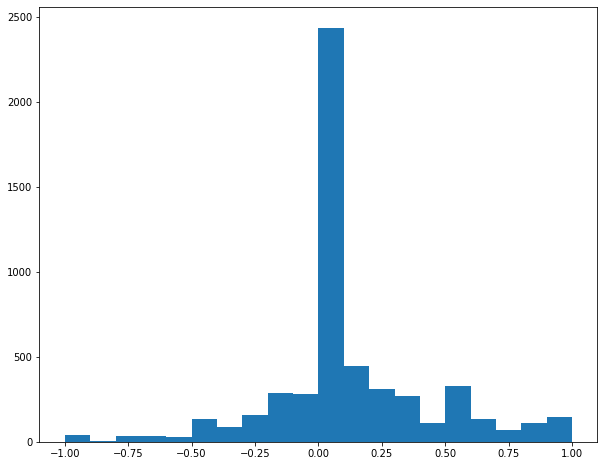

In [7]:
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(topdf['sentiment_score'], bins=20)
plt.show()

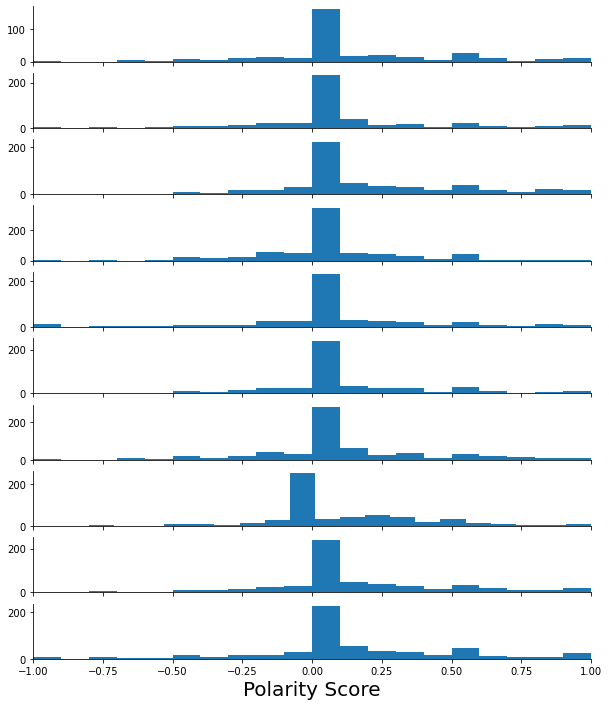

In [8]:
fig = plt.figure(figsize = (10,12))
i = 0
for vid, vid_group in topdf.groupby("videoId"):
    i+=1
    ax = fig.add_subplot(10,1,i)
    #ax.title(vid_group['title'])
    ax.hist(vid_group['sentiment_score'], bins=20)
    ax.set_xlim(-1,1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if i!=10:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel("Polarity Score", size=20)
plt.show()